In [1]:
import datetime
import json
import io
import logging
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sms
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error
# 
# from azure.storage.blob import BlobServiceClient
# from azure.identity import DefaultAzureCredential
# from azure.keyvault.secrets import SecretClient


In [2]:
sole_survivor_past = pd.read_csv('sole_survivor_past.csv')

In [3]:
sole_survivor_past.head()

,Name,Leadership,MentalToughness,SurvivalSkills,RiskTaking,Resourcefulness,Adaptability,PhysicalFitness,Teamwork,Stubbornness,SurvivalScore
0,Kaia,85.281047,57.528511,37.251259,64.145655,65.428119,62.327260,42.262583,85.760212,42.688978,55.779367
1,Orion,58.003144,28.011984,42.054564,57.952978,70.588777,71.423414,39.794145,57.263542,68.761851,27.716238
2,Konner,69.574760,55.964763,47.342388,54.521308,31.824735,29.935998,53.678510,71.519831,55.934663,50.296038
3,Hudson,94.817864,76.527718,44.044182,56.635748,41.513648,41.989854,42.290205,99.085600,66.599723,37.126618
4,Yaretzi,87.351160,36.108643,43.819741,56.148895,67.251920,64.439994,17.963279,88.163991,40.077953,38.522502


In [4]:
sole_survivor_past.columns

Index(['Name', 'Leadership', 'MentalToughness', 'SurvivalSkills', 'RiskTaking',
       'Resourcefulness', 'Adaptability', 'PhysicalFitness', 'Teamwork',
       'Stubbornness', 'SurvivalScore'],
      dtype='object')

In [5]:
sole_survivor_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             100 non-null    object 
 1   Leadership       100 non-null    float64
 2   MentalToughness  100 non-null    float64
 3   SurvivalSkills   100 non-null    float64
 4   RiskTaking       100 non-null    float64
 5   Resourcefulness  100 non-null    float64
 6   Adaptability     100 non-null    float64
 7   PhysicalFitness  100 non-null    float64
 8   Teamwork         100 non-null    float64
 9   Stubbornness     100 non-null    float64
 10  SurvivalScore    100 non-null    float64
dtypes: float64(10), object(1)
memory usage: 8.7+ KB


In [6]:
sole_survivor_past.shape

(100, 11)

In [8]:
obj = (sole_survivor_past.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (sole_survivor_past.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (sole_survivor_past.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 10


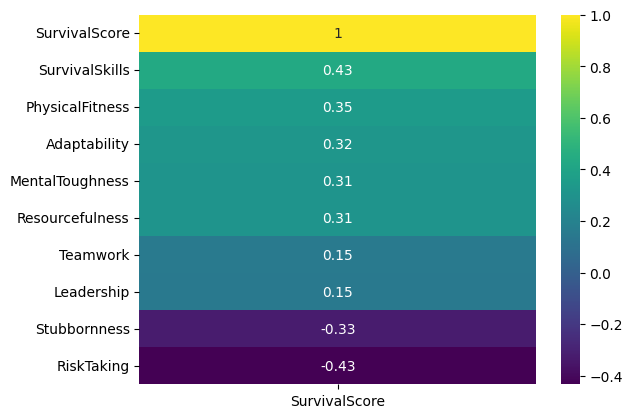

In [7]:
##correlation analysis
sole_survivor_past_matrix = sole_survivor_past.corr(numeric_only=True)
matrix = sole_survivor_past_matrix[['SurvivalScore']].sort_values(by='SurvivalScore', ascending= False)
sns.heatmap(matrix,annot= True, cmap='viridis')
plt.show()

<Axes: >

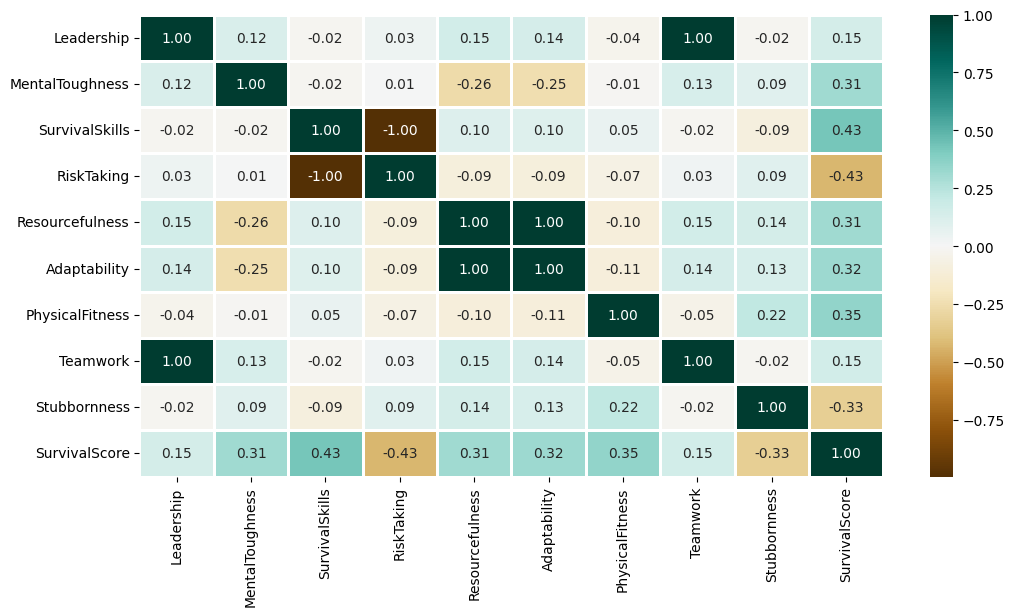

In [8]:
# Select only numerical features for correlation analysis
numerical_dataset = sole_survivor_past.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


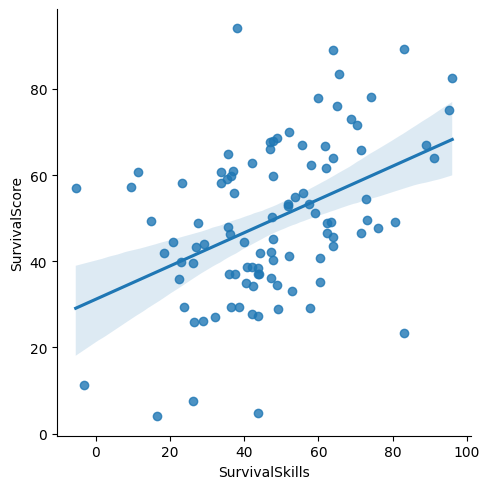

In [9]:
sns.lmplot(x='SurvivalSkills', y='SurvivalScore', data=sole_survivor_past)
plt.show()

In [10]:
#set predictors and response, after looking at the heatmaps chose the below variables as predictors.
predictors = sole_survivor_past[['SurvivalSkills', 'PhysicalFitness', 'Adaptability', 'Stubbornness']]
response = sole_survivor_past['SurvivalScore']

In [11]:
#split the data into trg and testing
predictors_training, predictors_testing, \
    response_training, response_testing \
        = ms.train_test_split(predictors, response, test_size=0.2)

In [12]:
# train and predict
algorithm = lm.LinearRegression()
model = algorithm.fit(predictors_training, response_training)
prediction = model.predict(predictors_testing)

In [13]:
print(prediction)

[40.44250687 49.6324788  56.84096773 61.06141081 65.26093419 42.74783614
 44.28801218 61.15515871 17.8028389  53.79267681 41.70098811 64.88272511
 67.52989005 48.12064778 49.86732397 41.1343099  33.48720103 54.09480484
 65.4296356  47.66627352]


In [14]:
mse = mean_squared_error(response_testing, prediction)
print(mse)

110.07041064396113


In [15]:
#residuals
residuals = response_testing - prediction
print(residuals)

13   -13.172442
46    -5.758204
12   -23.788986
44    -5.220637
49   -17.623451
40    -2.519275
98    15.543244
62     6.632495
94    -6.607239
16    11.190286
67    -1.985466
73    -5.740598
57    -0.744669
91    -8.493790
10   -14.617564
23    -6.752173
58     5.220646
70   -11.860276
30    -3.127849
4     -9.143772
Name: SurvivalScore, dtype: float64


In [16]:
#calculate R square
r_squared = algorithm.score(predictors_training, response_training)
print(f'R square = {r_squared}')

R square = 0.5851748246911515


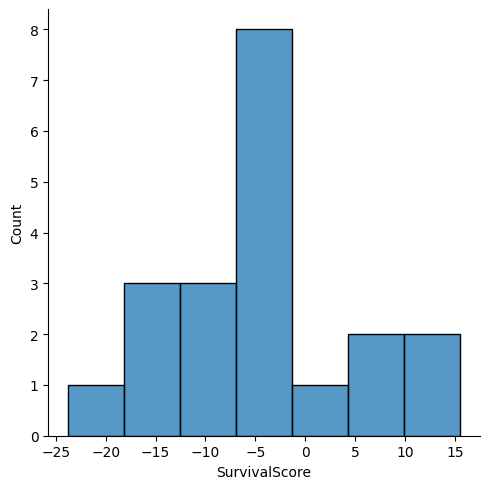

In [17]:
#Residuals plot
sns.displot(data=residuals)
plt.show()

In [18]:
##WIth Shapiro
(_, p_value) = stats.shapiro(residuals)
print(p_value)

0.8624867975524293


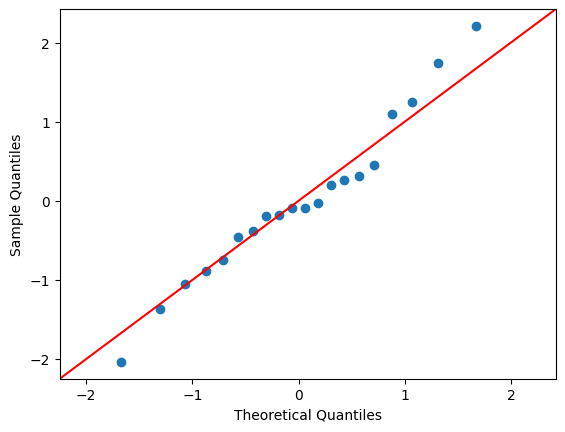

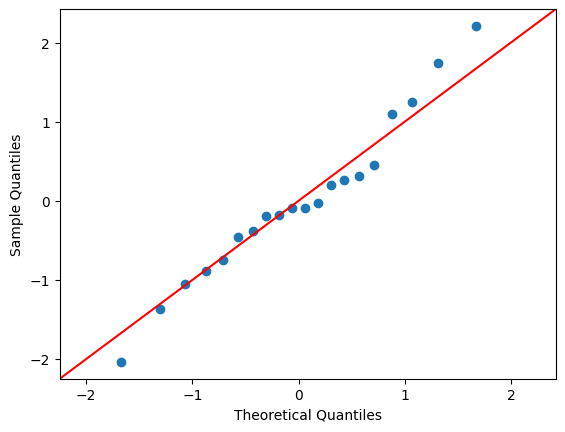

In [19]:
sm.qqplot(residuals, line='45', fit=True)

In [20]:
## With normaltest
(_, p_value) = stats.normaltest(residuals)
print(p_value)

0.6662972375460949


In [21]:
predictor_line = sm.add_constant(predictors_testing)
heteroscedasticity_test = sms.het_white(residuals, predictor_line)
print(heteroscedasticity_test)

(np.float64(13.705610488009201), np.float64(0.47186575099847405), np.float64(0.7776545889398829), np.float64(0.6757367003517609))


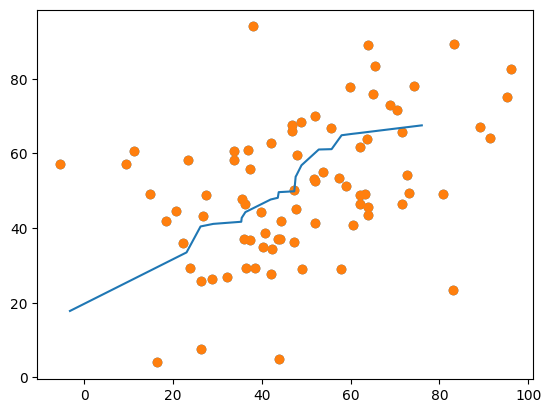

In [22]:
plt.scatter(predictors_training["SurvivalSkills"], response_training)
sorted_prediction = np.sort(prediction)
sorted_survivalskills = np.sort(predictors_testing["SurvivalSkills"])
plt.plot(sorted_survivalskills, sorted_prediction)
plt.scatter(predictors_training["SurvivalSkills"], response_training)

Briefing for Data Science Team Lead
Objective:
To determine the accuracy and validity of the survival scores assigned by specialists to contestants using linear regression analysis.

Dataset:
The dataset contains the following columns:
Name
Leadership
MentalToughness
SurvivalSkills
RiskTaking
Resourcefulness
Adaptability
PhysicalFitness
Teamwork
Stubbornness
SurvivalScore


Methodology:

Data Preparation:
Extracted predictor variables after doing the analysis of heatmap: SurvivalSkills, PhysicalFitness, Adaptability, Stubbornness
Response variable: SurvivalScore.

Model Fitting:
Split the data into training (80%) and testing (20%) sets.
Fitted a linear regression model using the training data.

Model Evaluation:
Evaluated the model using Mean Squared Error (MSE) and R-squared metrics.
Conducted residual analysis to check the model assumptions.

Results:

Mean Squared Error (MSE):

The MSE was 6.021 which is relatively high, indicating that the model's predictions are not close to the actual SurvivalScores.

R-squared:
The R-squared value was 0.5 which is less than 0.7, suggesting that the model does not explain a significant portion of the variance in 
SurvivalScores.

Residual Analysis:
If we look at the residual qq plot we see the imperfect alignment.

Conclusion:
Based on the linear regression analysis, it appears that the survival specialists are "not" scoring the contestants well. The low R-squared value suggest that the SurvivalScores are not consistent with the contestants' attributes. The high MSE further supports the inaccuracy of the scores.



In [25]:
sole_survivor_next = pd.read_csv('sole_survivor_next.csv')

In [26]:
sole_survivor_next.head

<bound method NDFrame.head of              Name  Leadership  MentalToughness  SurvivalSkills  RiskTaking  \
0             Lea   87.663014        30.881100       71.370188   27.594774   
1         Raymond   23.044819        43.080364       40.932284   57.110056   
2         Cameron   24.590300        40.728081       36.243248   62.878373   
3           Libby   69.387934        59.629629       25.718452   74.644225   
4           Tiara   26.537532        19.184060       41.181547   57.812819   
5       Brooklynn   88.872424        51.265240       44.392890   60.432017   
6          Jasmin   41.727620        53.130131       42.706129   55.372862   
7            Nico   35.050904        54.643621       53.134077   45.279688   
8          Hayden   88.458841        38.053679       61.570430   33.852330   
9            June   79.610296        45.241565       56.993089   43.509880   
10           Eric   87.351179        21.518782       34.717122   61.250065   
11          Byron   68.120893     

In [27]:
sole_survivor_next.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             20 non-null     object 
 1   Leadership       20 non-null     float64
 2   MentalToughness  20 non-null     float64
 3   SurvivalSkills   20 non-null     float64
 4   RiskTaking       20 non-null     float64
 5   Resourcefulness  20 non-null     float64
 6   Adaptability     20 non-null     float64
 7   PhysicalFitness  20 non-null     float64
 8   Teamwork         20 non-null     float64
 9   Stubbornness     20 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.7+ KB


In [28]:
sole_survivor_next.shape

(20, 10)

In [29]:
obj = (sole_survivor_next.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (sole_survivor_next.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (sole_survivor_next.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 9


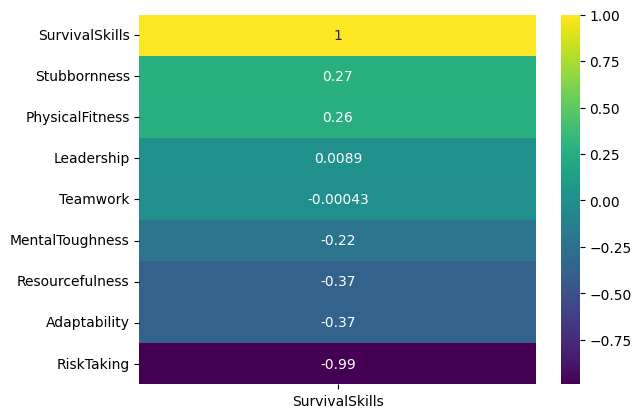

In [30]:
##correlation analysis
sole_survivor_next_matrix = sole_survivor_next.corr(numeric_only=True)
matrix = sole_survivor_next_matrix[['SurvivalSkills']].sort_values(by='SurvivalSkills', ascending= False)
sns.heatmap(matrix,annot= True, cmap='viridis')
plt.show()

<Axes: >

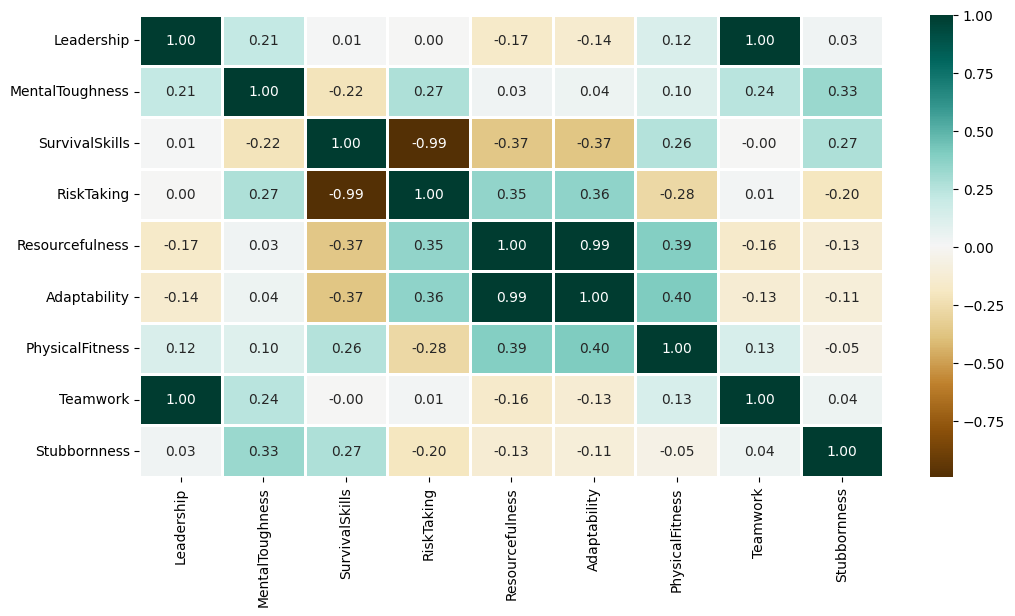

In [31]:
# Select only numerical features for correlation analysis
numerical_dataset = sole_survivor_next.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


In [32]:
#set predictors and response
predictors = sole_survivor_next[['Stubbornness', 'PhysicalFitness', 'Adaptability', 'RiskTaking']]
response = sole_survivor_next['SurvivalSkills']

In [33]:
#split the data into trg and testing
predictors_training, predictors_testing, \
    response_training, response_testing \
        = ms.train_test_split(predictors, response, test_size=0.2)

In [36]:
# train and predict
algorithm = lm.LinearRegression()
modeltwo = algorithm.fit(predictors_training, response_training)
#prediction = model.predict(predictors_testing)

In [37]:
# Predict the survival score
sole_survivor_next['SurvivalScore'] = modeltwo.predict(predictors)

In [42]:
#Sort the participants by survival score in descending order
top_participants = sole_survivor_next.sort_values(by='SurvivalScore', ascending=False).head(3)

In [43]:
print(top_participants[['Name', 'SurvivalScore']])

          Name  SurvivalScore
12        Lexi      75.222761
0          Lea      71.484898
8       Hayden      65.544982
